In [1]:
import torch
import numpy as np

In [2]:
N = 4
configuration = torch.rand((N**3,))*2*np.pi
configuration

tensor([6.2267e-01, 8.8225e-01, 1.6017e+00, 4.0576e+00, 1.3697e+00, 3.1738e+00,
        5.4004e+00, 3.9772e+00, 2.8005e+00, 1.1422e-04, 2.2291e+00, 5.8529e+00,
        5.6009e+00, 2.1803e+00, 3.8433e+00, 2.5597e+00, 1.8808e+00, 1.2478e+00,
        1.3530e+00, 4.3770e+00, 5.8572e+00, 5.9721e+00, 1.9647e+00, 1.1781e+00,
        4.0331e+00, 1.9024e+00, 1.2722e+00, 1.2331e+00, 5.6867e+00, 8.0866e-01,
        2.0033e+00, 3.6220e+00, 2.8571e+00, 4.1362e+00, 1.0353e+00, 6.3968e-02,
        2.2430e+00, 2.5394e+00, 4.5801e+00, 4.5868e+00, 3.8821e+00, 3.9557e+00,
        4.4364e+00, 8.2157e-01, 1.0889e+00, 5.2438e+00, 3.4970e+00, 3.9514e+00,
        5.9059e+00, 3.5791e+00, 5.3664e+00, 4.7738e+00, 5.2117e-01, 7.5724e-01,
        5.4668e+00, 1.1236e+00, 4.4733e+00, 4.9117e+00, 4.5462e+00, 1.7656e+00,
        4.2021e-01, 3.8261e+00, 3.9240e+00, 2.7635e+00])

In [3]:
lattice = configuration.view(N,N,N)
lattice

tensor([[[6.2267e-01, 8.8225e-01, 1.6017e+00, 4.0576e+00],
         [1.3697e+00, 3.1738e+00, 5.4004e+00, 3.9772e+00],
         [2.8005e+00, 1.1422e-04, 2.2291e+00, 5.8529e+00],
         [5.6009e+00, 2.1803e+00, 3.8433e+00, 2.5597e+00]],

        [[1.8808e+00, 1.2478e+00, 1.3530e+00, 4.3770e+00],
         [5.8572e+00, 5.9721e+00, 1.9647e+00, 1.1781e+00],
         [4.0331e+00, 1.9024e+00, 1.2722e+00, 1.2331e+00],
         [5.6867e+00, 8.0866e-01, 2.0033e+00, 3.6220e+00]],

        [[2.8571e+00, 4.1362e+00, 1.0353e+00, 6.3968e-02],
         [2.2430e+00, 2.5394e+00, 4.5801e+00, 4.5868e+00],
         [3.8821e+00, 3.9557e+00, 4.4364e+00, 8.2157e-01],
         [1.0889e+00, 5.2438e+00, 3.4970e+00, 3.9514e+00]],

        [[5.9059e+00, 3.5791e+00, 5.3664e+00, 4.7738e+00],
         [5.2117e-01, 7.5724e-01, 5.4668e+00, 1.1236e+00],
         [4.4733e+00, 4.9117e+00, 4.5462e+00, 1.7656e+00],
         [4.2021e-01, 3.8261e+00, 3.9240e+00, 2.7635e+00]]])

In [4]:
torch.roll(lattice, shifts=1, dims=1)


tensor([[[5.6009e+00, 2.1803e+00, 3.8433e+00, 2.5597e+00],
         [6.2267e-01, 8.8225e-01, 1.6017e+00, 4.0576e+00],
         [1.3697e+00, 3.1738e+00, 5.4004e+00, 3.9772e+00],
         [2.8005e+00, 1.1422e-04, 2.2291e+00, 5.8529e+00]],

        [[5.6867e+00, 8.0866e-01, 2.0033e+00, 3.6220e+00],
         [1.8808e+00, 1.2478e+00, 1.3530e+00, 4.3770e+00],
         [5.8572e+00, 5.9721e+00, 1.9647e+00, 1.1781e+00],
         [4.0331e+00, 1.9024e+00, 1.2722e+00, 1.2331e+00]],

        [[1.0889e+00, 5.2438e+00, 3.4970e+00, 3.9514e+00],
         [2.8571e+00, 4.1362e+00, 1.0353e+00, 6.3968e-02],
         [2.2430e+00, 2.5394e+00, 4.5801e+00, 4.5868e+00],
         [3.8821e+00, 3.9557e+00, 4.4364e+00, 8.2157e-01]],

        [[4.2021e-01, 3.8261e+00, 3.9240e+00, 2.7635e+00],
         [5.9059e+00, 3.5791e+00, 5.3664e+00, 4.7738e+00],
         [5.2117e-01, 7.5724e-01, 5.4668e+00, 1.1236e+00],
         [4.4733e+00, 4.9117e+00, 4.5462e+00, 1.7656e+00]]])

In [19]:
def XYd2n3_BC(configuration):
    N = int(len(configuration) ** (1/3))+1 #for N>=3
    configuration = configuration%(2*torch.pi)
    copy_config = torch.zeros_like(configuration)
    copy_config[N-1::N] = configuration[::N]-configuration[N-1::N]
    copy_config[-N**2:] = configuration[:N**2]-configuration[-N**2:]
    for k in range(N):
        copy_config[(k+1)*N**2-N:(k+1)*N**2] = configuration[k*N**2:k*N**2+N]-configuration[(k+1)*N**2-N:(k+1)*N**2]
    return configuration + copy_config

In [22]:
XYd2n3_BC(configuration).view(N,N,N)


tensor([[[6.2267e-01, 8.8225e-01, 1.6017e+00, 6.2267e-01],
         [1.3697e+00, 3.1738e+00, 5.4004e+00, 1.3697e+00],
         [2.8005e+00, 1.1422e-04, 2.2291e+00, 2.8005e+00],
         [6.2267e-01, 8.8225e-01, 1.6017e+00, 4.0576e+00]],

        [[1.8808e+00, 1.2478e+00, 1.3530e+00, 1.8808e+00],
         [5.8572e+00, 5.9721e+00, 1.9647e+00, 5.8572e+00],
         [4.0331e+00, 1.9024e+00, 1.2722e+00, 4.0331e+00],
         [1.8808e+00, 1.2478e+00, 1.3530e+00, 4.3770e+00]],

        [[2.8571e+00, 4.1362e+00, 1.0353e+00, 2.8571e+00],
         [2.2430e+00, 2.5394e+00, 4.5801e+00, 2.2430e+00],
         [3.8821e+00, 3.9557e+00, 4.4364e+00, 3.8821e+00],
         [2.8571e+00, 4.1362e+00, 1.0353e+00, 6.3968e-02]],

        [[6.2267e-01, 8.8225e-01, 1.6017e+00, 4.0576e+00],
         [1.3697e+00, 3.1738e+00, 5.4004e+00, 3.9772e+00],
         [2.8005e+00, 1.1444e-04, 2.2291e+00, 5.8529e+00],
         [5.9059e+00, 3.5791e+00, 5.3664e+00, 4.7738e+00]]])

In [23]:
lattice

tensor([[[6.2267e-01, 8.8225e-01, 1.6017e+00, 4.0576e+00],
         [1.3697e+00, 3.1738e+00, 5.4004e+00, 3.9772e+00],
         [2.8005e+00, 1.1422e-04, 2.2291e+00, 5.8529e+00],
         [5.6009e+00, 2.1803e+00, 3.8433e+00, 2.5597e+00]],

        [[1.8808e+00, 1.2478e+00, 1.3530e+00, 4.3770e+00],
         [5.8572e+00, 5.9721e+00, 1.9647e+00, 1.1781e+00],
         [4.0331e+00, 1.9024e+00, 1.2722e+00, 1.2331e+00],
         [5.6867e+00, 8.0866e-01, 2.0033e+00, 3.6220e+00]],

        [[2.8571e+00, 4.1362e+00, 1.0353e+00, 6.3968e-02],
         [2.2430e+00, 2.5394e+00, 4.5801e+00, 4.5868e+00],
         [3.8821e+00, 3.9557e+00, 4.4364e+00, 8.2157e-01],
         [1.0889e+00, 5.2438e+00, 3.4970e+00, 3.9514e+00]],

        [[5.9059e+00, 3.5791e+00, 5.3664e+00, 4.7738e+00],
         [5.2117e-01, 7.5724e-01, 5.4668e+00, 1.1236e+00],
         [4.4733e+00, 4.9117e+00, 4.5462e+00, 1.7656e+00],
         [4.2021e-01, 3.8261e+00, 3.9240e+00, 2.7635e+00]]])

In [109]:
X = torch.tensor([1,2,3,4])

In [113]:
X[2:]

tensor([3, 4])

In [114]:
X[:2]

tensor([1, 2])

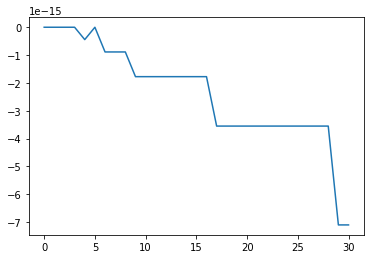

In [6]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0,30, 31)

y = x**3
plt.plot(x, y**(1/3)-x)


In [10]:
(15**3+1)**(1/3)

15.001481335186401

In [1]:
15*15*15

3375